Signature and Log-signature for the Study of Empirical Distributions Generated with GANs. https://arxiv.org/abs/2203.03226

J. de Curtò y DíAz, I. de Zarzà i Cubero and Hong Yan.
{decurtoydiaz,dezarzaycubero}@innocimda.com

**Acknowledgements**

This work is part of CIMDA (Centre for Intelligent Multidimensional Data Analysis), HK Science Park, HK.

A joint Center between City University of Hong Kong and the University of Oxford.

Our work has been supported by HK Innovation and Technology Commission (InnoHK Project CIMDA) and HK Research Grants Council (Project CityU 11204821).

In this notebook we are going to illustrate how to compute RMSE and MAE Signature and log-signature introduced in Section 7. 

In particular RMSE and MAE $\tilde{S}^{3}$ and RMSE and MAE $\log \tilde{S}^{3}$ by comparing the original MetFaces and a set of 1000 samples that have to be previously generated with a pre-trained model of Stylegan2-ada or $\{r,t\}$-Stylegan3-ada.

First, load your drive and make sure you have a folder with MetFaces (you can add a shortcut to drive from the original dataset found here https://github.com/NVlabs/metfaces-dataset) and also another folder with for instance 1000 synthetic images generated with Stylegan2-ada or Stylegan3-ada.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install the following dependency to be able to compute the Signatures and log-signatures.

In [ ]:
!pip install iisignature

     |████████████████████████████████| 1.3 MB 4.5 MB/s 
  Created wheel for iisignature: filename=iisignature-0.24-cp37-cp37m-linux_x86_64.whl size=2528264 sha256=d094f082a9246a9227ef430f2a2c331d1f81a649c7dd1a1cc8b47553154774e6
  Stored in directory: /root/.cache/pip/wheels/d6/99/a3/b2b3f95df7c69f664e92b4ec58b8da922cb95bc394700cbc0f
Successfully built iisignature


Change the following path accordingly. One with the full dataset (folder) and another with a set of synthetic samples to compare (folder2).

In [ ]:
folder = '/content/drive/MyDrive/metfaces-release/images'
folder2 = '/content/drive/MyDrive/StyleGAN2-ADA/out/metfaces_1000/'

Then compute the signatures of order 3 and size 64x64 of each dataset and store them in vectors. Images are transformed to grayscale previous to the computation of the signatures.

In [ ]:
import cv2
import os
import iisignature

dataA= []
dataAA = []

for filename in os.listdir(folder):
    image = cv2.imread(os.path.join(folder,filename))
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (64,64))
        image = iisignature.sig(image, 3)
        dataA.append([image, folder + filename])

for filename2 in os.listdir(folder2):
    image2 = cv2.imread(os.path.join(folder2,filename2))
    if image2 is not None:
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        image2 = cv2.resize(image2, (64,64))
        image2 = iisignature.sig(image2, 3)
        dataAA.append([image2, folder2 + filename2])

Or if your prefer, compute the log-signatures up to depth 3 of size 64x64 of each dataset and store them in vectors. Images are transformed to grayscale previous to the computation of the signatures.

In [ ]:
import cv2
import os
import iisignature

dataA= []
dataAA = []

s = iisignature.prepare(64,3)
for filename in os.listdir(folder):
    image = cv2.imread(os.path.join(folder,filename))
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (64,64))
        image = iisignature.logsig(image, s)
        dataA.append([image, folder + filename])

for filename2 in os.listdir(folder2):
    image2 = cv2.imread(os.path.join(folder2,filename2))
    if image2 is not None:
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        image2 = cv2.resize(image2, (64,64))
        image2 = iisignature.logsig(image2, s)
        dataAA.append([image2, folder2 + filename2])

Extract the information into arrays for further processing. Print the length.

In [ ]:
print(len(dataA))
featuresA, imagesA  = zip(*dataA)

print(len(dataAA))
featuresAA, imagesAA  = zip(*dataAA)

1336
1000


Compute the element-wise means of the signatures or log-signatures. Print the length. For example, in the case of the Signature the feature dimension is $ \frac{d^{N+1} - 1}{d - 1} - 1$, where $d = 64$ and $N=3$. 

In [ ]:
import numpy as np

supermeanA = np.mean(featuresA, axis=0)
print(len(supermeanA))
supermeanAA = np.mean(featuresAA, axis=0)
print(len(supermeanAA))

89440
89440


Plot the spectrum for visual analysis.

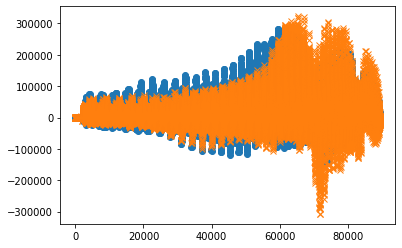

In [ ]:
import matplotlib.pyplot as plt

plt.plot(supermeanA,'o')
plt.plot(supermeanAA,'x')
plt.show()

Finally compute RMSE Signature or RMSE log-signature

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(supermeanA, supermeanAA, squared=False)
print(rmse)

25685.250972812468


and MAE Signature or MAE log-signature.

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(supermeanA, supermeanAA)
print(error)

18071.468127339074
